In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


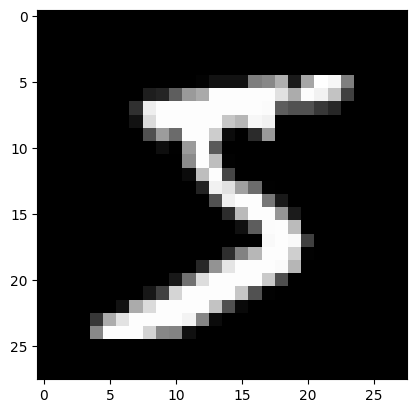

In [3]:
plt.imshow(x_train[0], cmap = 'gray')

In [5]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


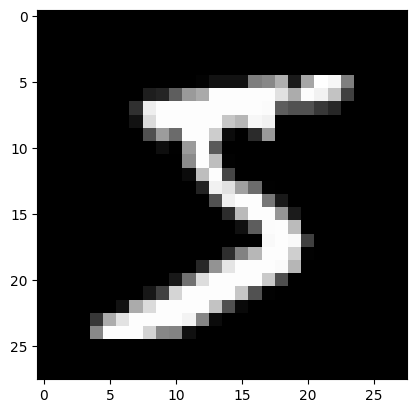

Prediction:  5


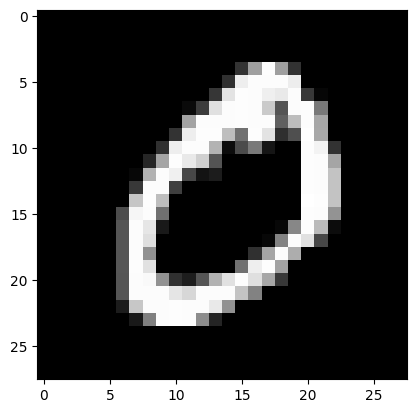

Prediction:  0


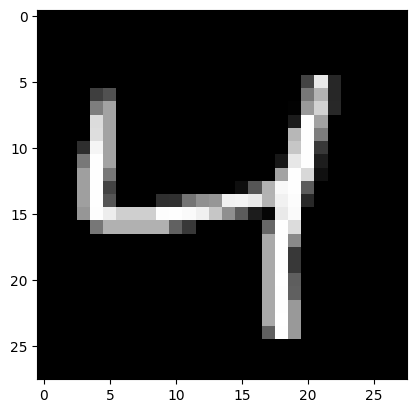

Prediction:  4


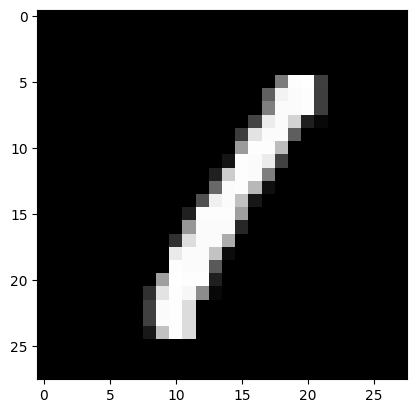

Prediction:  1


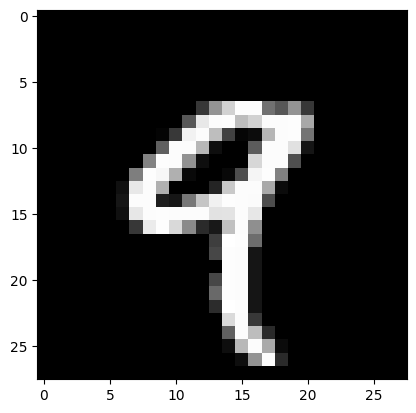

Prediction:  9


In [14]:
number_of_images = 5

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

In [15]:
incorrect_predictions = []

# Predict on the test set
test_probabilities = model.predict(x_test)
test_predictions = np.argmax(test_probabilities, axis=1)

# Find incorrect predictions
for i in range(len(y_test)):
    if test_predictions[i] != y_test[i]:
        incorrect_predictions.append((x_test[i], test_predictions[i], y_test[i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


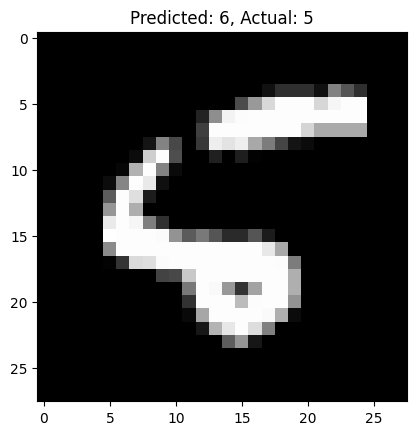

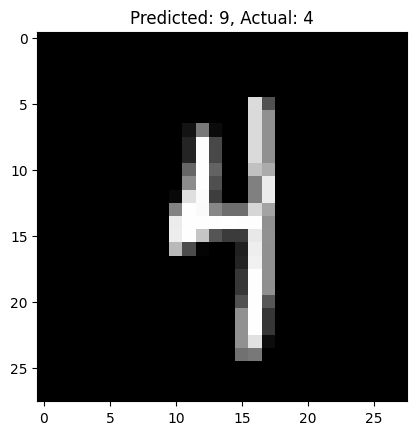

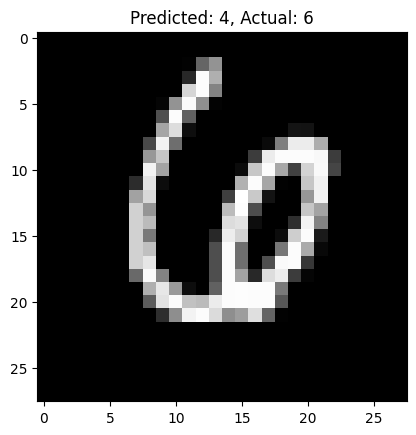

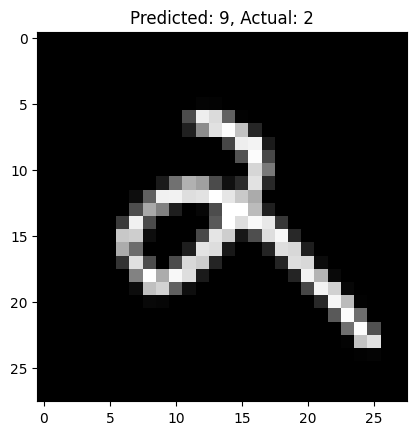

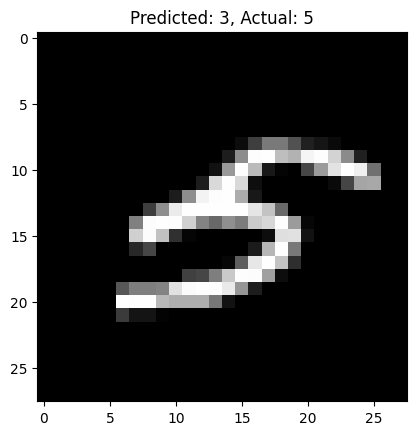

In [17]:
# Display some incorrect predictions
num_incorrect_to_show = 5
for i in range(num_incorrect_to_show):
    image, predicted, actual = incorrect_predictions[i]
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted}, Actual: {actual}")
    plt.show()